In [1]:
%load_ext autoreload 
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import resfuncRead as rfr
from scipy.stats import kde
from data_check import *
from Band_plots import *
from ER_Yield import Yield_Er 
from NR_Yield import Yield_Nr
from bin_data_check import * 
from Dist_check import *  
from Data_check_continuous import * 




In [2]:

N = 1000000
eps = .0033
s = 1
fano = 0.13 # 'known' fano factor for electron recoils. 

bins = np.array([10,13.4,18.1,24.5,33.1,44.8,60.6,80.2,110])
bins_cont = np.linspace(10,110,10000)
Eer = np.random.choice(bins,N)


df  = Yield_Er(Eer,fano) #Electron Recoil Band with fano

df_count = Yield_Er(bins_cont,fano) #with fano 


In [3]:
#NR_band_plot(df)

#ER_band_plot(df,N)  


In [4]:
expected,Er_true = continuous_containment(df_count,s,band_er)

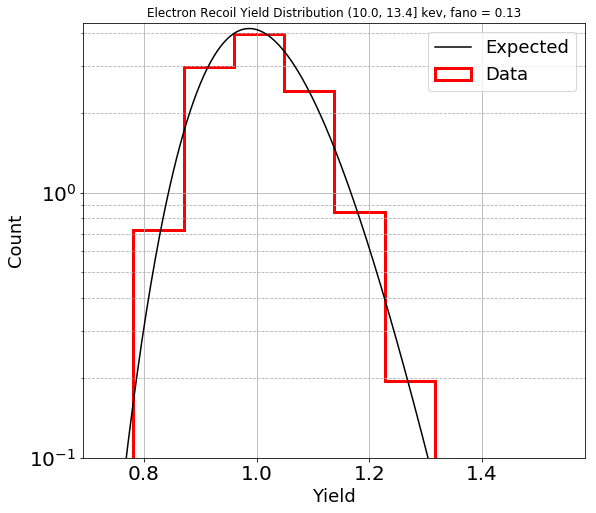

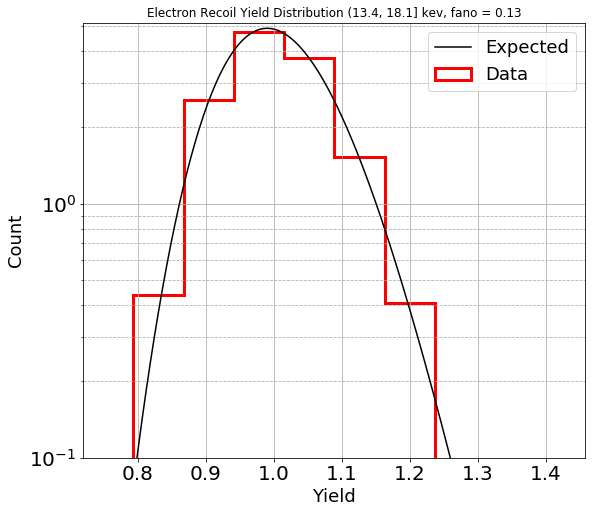

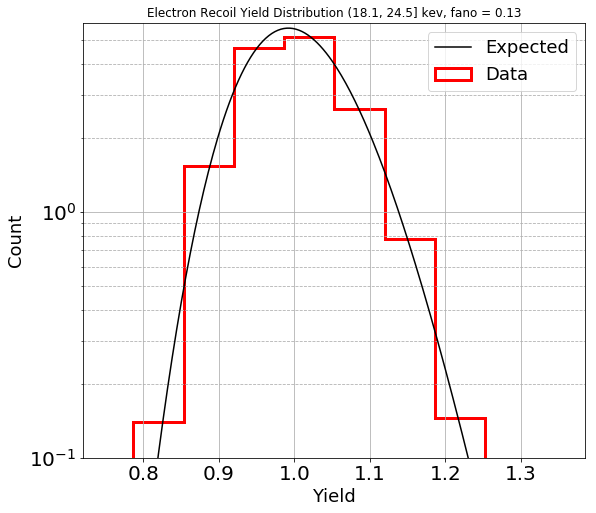

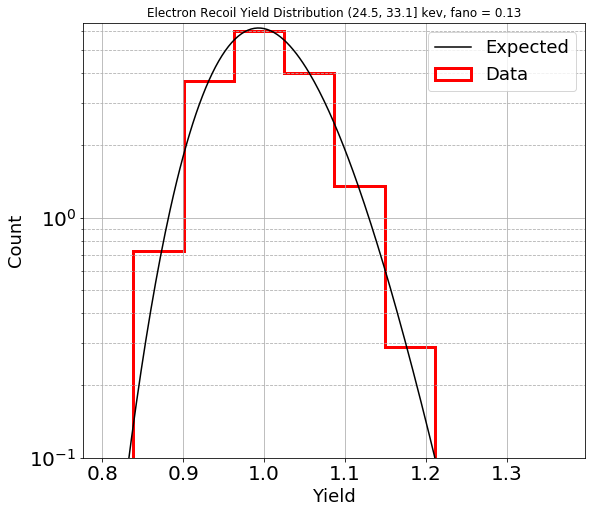

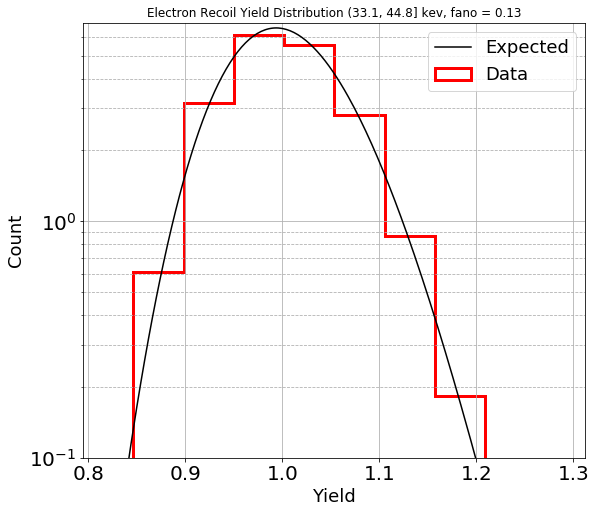

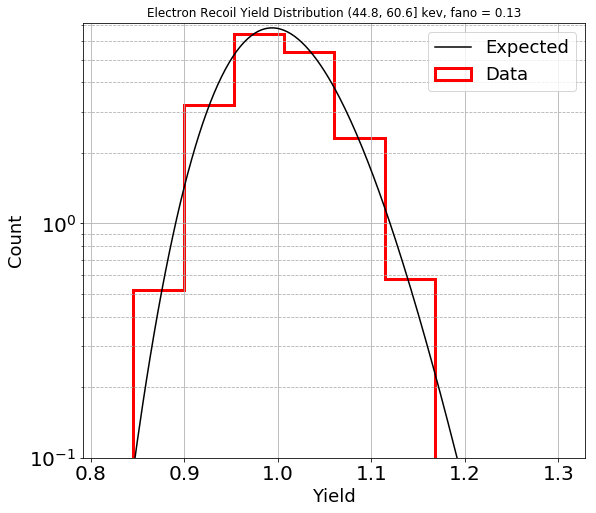

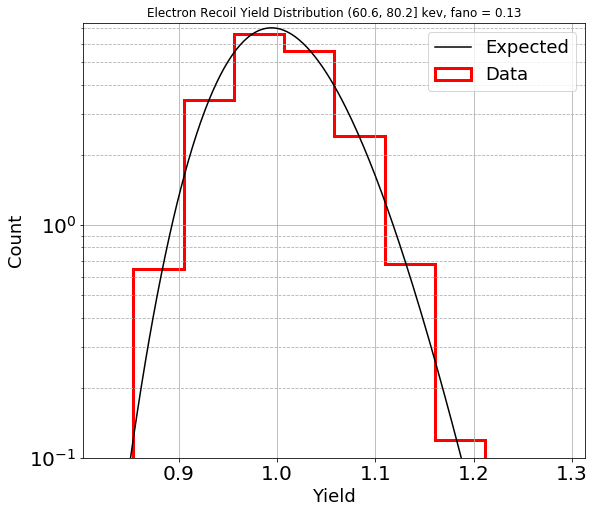

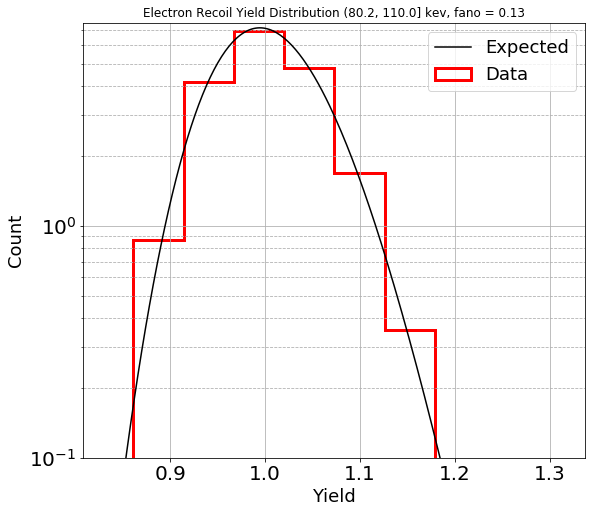

--------------------------------------------
1 SIGMA ELECTRON RECOIL BAND
--------------------------------------------
Bin Spacing (keV) 	 Percent in band 	 Expected 	 	 Percent from high 	 Percent from low
-------------- 	 	------------------- 	------------------- 	------------------- 	-------------------
(10.0, 13.4] 	 	 74.97 	 ± 0.13 % 	 74.55 	 	 	 71.11 	 ± 0.21 	 78.82 	 ± 0.18
(13.4, 18.1] 	 	 75.27 	 ± 0.13 % 	 74.65 	 	 	 72.18 	 ± 0.21 	 78.36 	 ± 0.19
(18.1, 24.5] 	 	 74.54 	 ± 0.13 % 	 73.99 	 	 	 71.26 	 ± 0.21 	 77.83 	 ± 0.19
(24.5, 33.1] 	 	 73.20 	 ± 0.13 % 	 72.51 	 	 	 70.35 	 ± 0.21 	 76.05 	 ± 0.19
(33.1, 44.8] 	 	 70.54 	 ± 0.14 % 	 70.29 	 	 	 67.90 	 ± 0.22 	 73.18 	 ± 0.20
(44.8, 60.6] 	 	 68.03 	 ± 0.14 % 	 67.69 	 	 	 65.62 	 ± 0.23 	 70.44 	 ± 0.21
(60.6, 80.2] 	 	 69.12 	 ± 0.14 % 	 68.92 	 	 	 66.72 	 ± 0.22 	 71.51 	 ± 0.21
(80.2, 110.0] 	 	 69.97 	 ± 0.14 % 	 69.81 	 	 	 67.47 	 ± 0.22 	 72.48 	 ± 0.21
--------------------------------------------
[11.7,

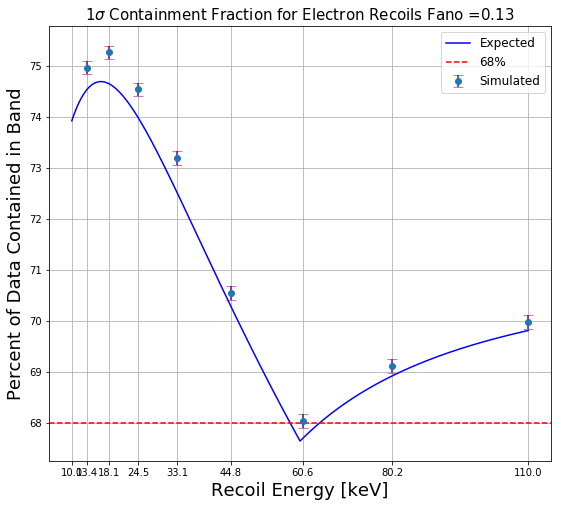

In [5]:

cut_idx = 'E_true' # True energy
#cut_idx = 'E_measured' # Measured Energy

df,bincenters = bin_check(df,1,band_er,bins,cut_idx,expected,Er_true,fano)#For electron Recoils with fano factor 
